# Depth optim experiment

Try to re-grow the ridge underneath PIG near the grounding line through an optimization problem.

Model details
- the PIG setup
- NLFS + rstar
- hFac spline + smoothmin/smoothmax
- 3 year spinup

Inversion details
- Observations:
    - 1 month average $\eta$ at 4 mooring locations outside iceshelf extent
    - Gaussian, IID 
    - $\sigma(i,j)= $ 5\% temporal avg $\eta(i,j)$
- Prior mean: ridge is not present (removing this was very ad hoc)
- Prior uncertainty: 
    1. diagonal matrix with values
        - 20m in open ocean
        - 100m under ice shelf
        - 0m uncertainty for dry points :( 
    2. something more fancy ...
- Using BFGS Quasi-Newton algorithm    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from xmitgcm import open_mdsdataset
from MITgcmutils import rdmds

In [2]:
ds = open_mdsdataset('/workspace/ase-adjoint/pig/generic/run_fwd_08.3yr_spinup',
                     geometry = 'sphericalpolar',
                     iters=0,
                     ignore_unknown_vars=True)

/workspace/xmitgcm/xmitgcm/utils.py:429: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)
/workspace/xmitgcm/xmitgcm/mds_store.py:269: FutureWarning: iteration over an xarray.Dataset will change in xarray v0.11 to only include data variables, not coordinates. Iterate over the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  for vname in ds:


### Show prior information

In [30]:
results_dir = '/workspace/results/pig/bathy-eta-inversion'
bathy_truth = rdmds(('%s/bathy-prior/bathymetry_truth' % results_dir))
bathy_prior = rdmds(('%s/bathy-prior/bathymetry_noRidgePrior' % results_dir))
bathy_uncertainty = rdmds(('%s/bathy-prior/bathymetry_uncertainty' % results_dir))
bathy_wt = np.where(bathy_uncertainty!=0,pow(bathy_uncertainty,-2),0)

/workspace/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


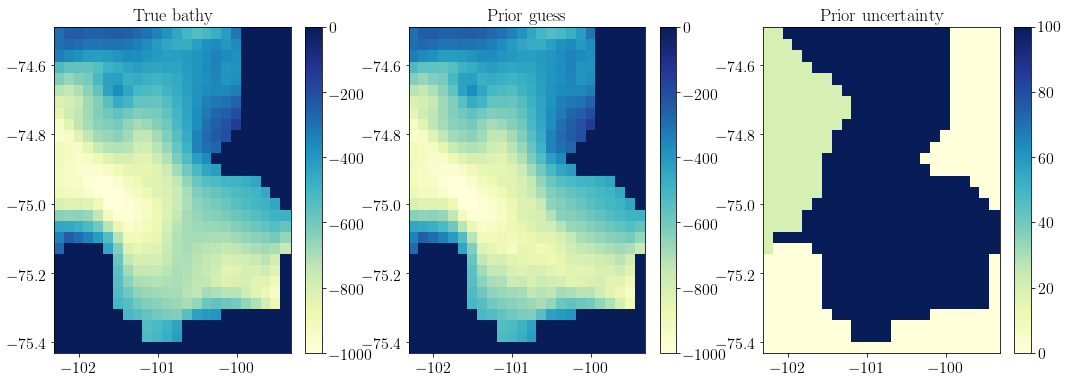

In [32]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.pcolormesh(ds.XC,ds.YC,bathy_truth,
              cmap='YlGnBu')
plt.colorbar()
plt.title('True bathy')

plt.subplot(1,3,2)
plt.pcolormesh(ds.XC,ds.YC,bathy_prior,
              cmap='YlGnBu')
plt.colorbar()
plt.title('Prior guess')

plt.subplot(1,3,3)
plt.pcolormesh(ds.XC,ds.YC,bathy_uncertainty,
              cmap='YlGnBu')
plt.colorbar()
plt.title('Prior uncertainty')

plt.show()

### Show the observations: monthly mean sea level

In [35]:
eta_truth = rdmds(('%s/eta-truth-3yr-spinup/surfDiag' % results_dir),itrs=106560,rec=0)
eta_obs   = rdmds(('%s/eta-obs-3yr-spinup/eta_mooring.obs' % results_dir))
eta_err   = rdmds(('%s/eta-obs-3yr-spinup/eta_mooring.err' % results_dir))

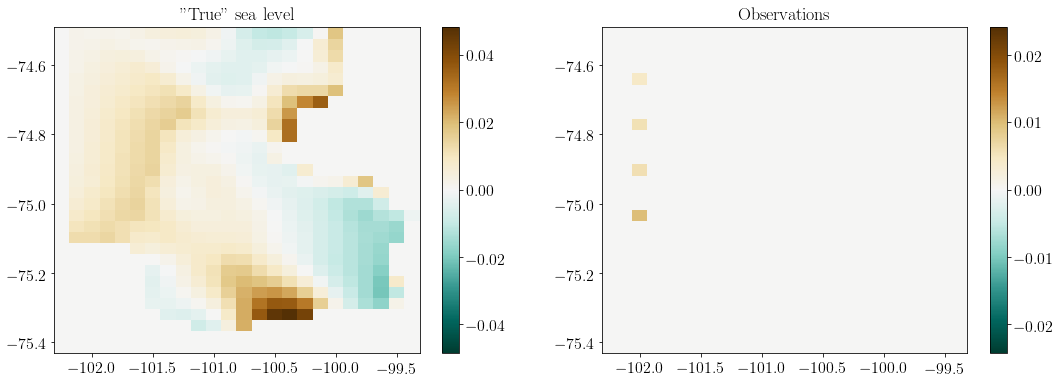

In [36]:
plt.figure(figsize=(18,6))

cmax=np.max(np.abs(eta_truth))
plt.subplot(1,2,1)
plt.pcolormesh(ds.XC,ds.YC,eta_truth,
               vmin=-cmax, vmax=cmax,
               cmap='BrBG_r')
plt.colorbar()
plt.title('"True" sea level')

plt.subplot(1,2,2)
plt.pcolormesh(ds.XC,ds.YC,eta_obs,
               vmin=-cmax/2, vmax=cmax/2,
               cmap='BrBG_r')
plt.colorbar()
plt.title('Observations')

plt.show()

In [28]:
print(3600*24*5)

432000
